# **INTRODUCTION TO MACHINE LEARNING**

### **Load the Required Libraries for Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Initialize Data Importation Process**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving htn_dat.csv to htn_dat.csv


### **Load the Data as CSV**

In [17]:
df = pd.read_csv('htn_dat.csv')
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120
0,16097,60,90,NaN,28.000000,0.0,0,NaN,NaN,338,1,1,0,NaN,0.924379,0
1,930,75,110,27.339912,26.458590,1.0,0,-3.9,0.0,439,1,1,1,5.421770e-02,1.163862,0
2,6877,60,80,17.689789,42.951405,0.0,0,-3.2,NaN,752,1,1,0,-3.597409e-01,0.721148,0
3,36464,60,90,19.854080,50.149212,1.0,1,NaN,NaN,526,1,1,1,NaN,0.829452,0
4,36180,60,100,21.295294,30.554415,0.0,1,-0.4,NaN,215,1,1,0,-1.000000e-07,0.856046,0


#### **View Variables Definition and their Measurement**

In [18]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary
variables_dict = pd.DataFrame({
    'Variable': [
        'ID', 'DBP', 'SBP', 'BMI', 'age', 'married', 'male.gender',
        'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive',
        'urban.clinic', 'log_creat_centered', 'IPW_weight', 'SBP_ge120'
    ],
    'Type': [
        'Integer', 'Integer', 'Integer', 'Float', 'Float', 'Binary', 'Binary',
        'Float', 'Binary', 'Integer', 'Binary', 'Binary',
        'Binary', 'Float', 'Float', 'Binary'
    ],
    'Description': [
        'Unique patient identifier',
        'Diastolic blood pressure',
        'Systolic blood pressure',
        'Body Mass Index',
        'Patient age in years',
        'Marital status',
        'Gender indicator',
        'Hemoglobin (centered around mean)',
        'Advanced HIV disease status',
        'Survival time in days',
        'Event indicator (hypertension onset)',
        'Antiretroviral therapy naive status',
        'Clinic location',
        'Log-transformed creatinine (centered)',
        'Inverse probability weighting weight',
        'Hypertension indicator (SBP ≥ 120 mmHg)'
    ],
    'Values / Units': [
        'Unique ID',
        'mmHg',
        'mmHg',
        'kg/m²',
        'Years',
        '1 = Married, 0 = Not married',
        '1 = Male, 0 = Female',
        'g/dL (mean-centered)',
        '1 = Yes, 0 = No, NA = Missing',
        'Days',
        '1 = Event occurred, 0 = Censored',
        '1 = Naive, 0 = Experienced',
        '1 = Urban, 0 = Rural',
        'log(mg/dL) (centered)',
        'Continuous weight',
        '1 = Hypertensive, 0 = Normotensive'
    ],
    'Notes': [
        'The-identified patient ID',
        'Normal range: 60–80 mmHg',
        'Primary outcome variable',
        'Missing values present (NA)',
        'Range: 16–80 years',
        'Self-reported status',
        'Biological sex assigned at birth',
        'Centered = raw value minus cohort mean',
        'CD4 <200 cells/μL or WHO Stage 3/4',
        'Time to hypertension diagnosis or censoring',
        'Primary outcome for survival analysis',
        'Never received ARVs before enrollment',
        'Based on clinic administrative location',
        'Centered for modeling stability',
        'For causal inference adjustment',
        'Clinical threshold per WHO guidelines'
    ]
})

# Display as styled table
display(HTML(
    variables_dict.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
ID,Integer,Unique patient identifier,Unique ID,The-identified patient ID
DBP,Integer,Diastolic blood pressure,mmHg,Normal range: 60–80 mmHg
SBP,Integer,Systolic blood pressure,mmHg,Primary outcome variable
BMI,Float,Body Mass Index,kg/m²,Missing values present (NA)
age,Float,Patient age in years,Years,Range: 16–80 years
married,Binary,Marital status,"1 = Married, 0 = Not married",Self-reported status
male.gender,Binary,Gender indicator,"1 = Male, 0 = Female",Biological sex assigned at birth
hgb_centered,Float,Hemoglobin (centered around mean),g/dL (mean-centered),Centered = raw value minus cohort mean
adv_HIV,Binary,Advanced HIV disease status,"1 = Yes, 0 = No, NA = Missing",CD4 <200 cells/μL or WHO Stage 3/4
survtime,Integer,Survival time in days,Days,Time to hypertension diagnosis or censoring


## **Data Cleaning and Preprocessing**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   DBP                 4999 non-null   int64  
 2   SBP                 4999 non-null   int64  
 3   BMI                 4329 non-null   float64
 4   age                 4999 non-null   float64
 5   married             4835 non-null   float64
 6   male.gender         4999 non-null   int64  
 7   hgb_centered        3605 non-null   float64
 8   adv_HIV             3038 non-null   float64
 9   survtime            4999 non-null   int64  
 10  event               4999 non-null   int64  
 11  arv_naive           4999 non-null   int64  
 12  urban.clinic        4999 non-null   int64  
 13  log_creat_centered  3461 non-null   float64
 14  IPW_weight          4999 non-null   float64
 15  SBP_ge120           4999 non-null   int64  
dtypes: flo

### **Check the Number of Missing Variables for Each Variable**

In [20]:
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,670
age,0
married,164
male.gender,0
hgb_centered,1394
adv_HIV,1961
survtime,0


#### **Visualization of the Missing Observations per Variable**

/tmp/ipython-input-1370644638.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')


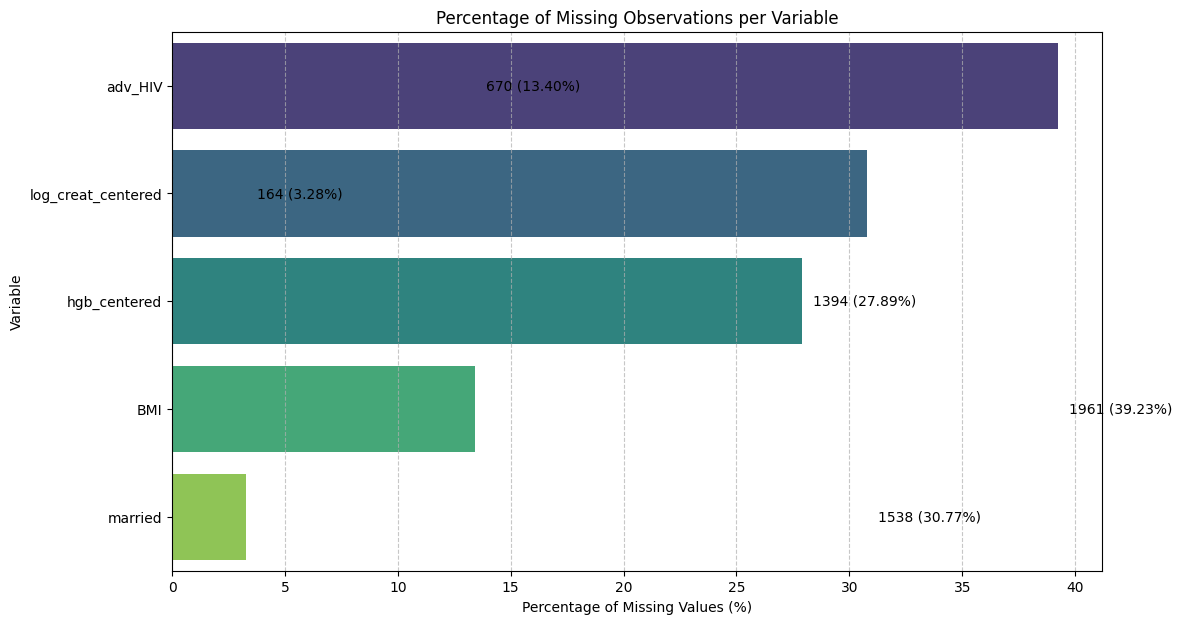

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Calculate percentages
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
})

# Sort by missing percentage
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Missing Percentage', y='Variable', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Observations per Variable')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Variable')

# Add frequency and percentage labels to the bars
for index, row in missing_df.iterrows():
    plt.text(row['Missing Percentage'] + 0.5, index,
             f"{row['Missing Count']} ({row['Missing Percentage']:.2f}%)",
             color='black', va="center")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Delete All Rows with Missing Values**

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,0
age,0
married,0
male.gender,0
hgb_centered,0
adv_HIV,0
survtime,0


### **Create the Target Variables**

In [25]:
# Create the 'Hypertensio' target variable
# A common definition of hypertension is SBP >= 140 or DBP >= 90
df['Hypertension'] = ((df['SBP'] >= 140) | (df['DBP'] >= 90)).astype(int)

In [27]:
# Display the value counts for the new target variable
print("Value counts for 'Hypertensio':")
df['Hypertension'].value_counts()

# Display the first few rows with the new variable
print("\nDataFrame head with 'Hypertensio':")
df[['SBP', 'DBP', 'Hypertension']].head()

Value counts for 'Hypertensio':

DataFrame head with 'Hypertensio':


,SBP,DBP,Hypertension
1,110,75,0
11,120,60,0
12,127,53,0
17,110,70,0
22,100,75,0


In [28]:
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120,Hypertension
1,930,75,110,27.339912,26.458590,1.0,0,-3.90,0.0,439,1,1,1,0.054218,1.163862,0,0
11,46748,60,120,23.068195,40.531143,1.0,1,-3.93,1.0,914,1,1,0,0.223143,0.856046,0,0
12,17789,53,127,21.989893,32.919918,1.0,0,-1.30,1.0,23,1,1,1,-0.278203,0.916506,0,0
17,35892,70,110,20.983988,36.596851,0.0,1,1.10,0.0,356,1,1,0,0.013621,0.667708,0,0
22,35839,75,100,15.396691,42.488705,1.0,1,-0.80,1.0,439,1,1,1,0.068993,0.829452,0,0


### **View the Distribution of Cases**

In [30]:
frequency_table = df['Hypertension'].value_counts().reset_index()
frequency_table.columns = ['Hypertension Status', 'Frequency']
frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100
print(frequency_table.to_string(index=False))

 Hypertension Status  Frequency  Percentage
                   0       2126   91.401548
                   1        200    8.598452


## **Data Partitioning for Machine Learning**

In [66]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Dropping 'ID' as it's an identifier and 'SBP_ge120' as it's the target
X = df.drop(columns=['SBP','DBP','ID', 'SBP_ge120','Hypertension'])
y = df['Hypertension']

In [67]:
X.head()

,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight
1,27.339912,26.458590,1.0,0,-3.90,0.0,439,1,1,1,0.054218,1.163862
11,23.068195,40.531143,1.0,1,-3.93,1.0,914,1,1,0,0.223143,0.856046
12,21.989893,32.919918,1.0,0,-1.30,1.0,23,1,1,1,-0.278203,0.916506
17,20.983988,36.596851,0.0,1,1.10,0.0,356,1,1,0,0.013621,0.667708
22,15.396691,42.488705,1.0,1,-0.80,1.0,439,1,1,1,0.068993,0.829452


In [68]:
y.head()

,Hypertension
1,0
11,0
12,0
17,0
22,0


In [69]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
### View the Shape of the Train and Test Dataset
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1628, 12)
X_test shape: (698, 12)
y_train shape: (1628,)
y_test shape: (698,)


### **K-Nearest Neighbors (KNN)**


### 📌 K-Nearest Neighbors (KNN) – Simple Notes for Undergraduates

#### 1. What is KNN?
KNN is a **lazy learning** algorithm used for both classification and regression. It makes predictions based on the **k closest data points** (neighbors) in the training set.

- **Classification**: Predict the *majority class* among the k neighbors  
- **Regression**: Predict the *average value* of the k neighbors

> 💡 **Key idea**: "Tell me who your neighbors are, and I'll tell you who you are."

---

#### 2. Distance Metrics (How we measure "closeness")

For two points **x = (x₁, x₂, ..., xₚ)** and **y = (y₁, y₂, ..., yₚ)** in *p*-dimensional space:

| Metric | Formula | When to use |
|--------|---------|-------------|
| **Euclidean** | $d(x,y) = \sqrt{\sum_{i=1}^{p}(x_i - y_i)^2}$ | Default choice; works well when features are on similar scales |
| **Manhattan** | $d(x,y) = \sum_{i=1}^{p}\|x_i - y_i\|$ | Better for grid-like paths or high-dimensional data |

> ⚠️ **Always standardize features** before KNN (e.g., using `StandardScaler`) because distance is sensitive to feature scales.

---

#### 3. KNN Classification – Simple Math

Given a new point **x₀**:

1. Compute distance from **x₀** to all training points
2. Find the **k** nearest neighbors
3. Predict the class with highest frequency:

$$
\hat{y}_0 = \text{mode}\{y_i : x_i \in \mathcal{N}_k(x_0)\}
$$

where $\mathcal{N}_k(x_0)$ = set of k nearest neighbors of $x_0$

---

#### 4. KNN Regression – Simple Math

Predict the average target value of the k neighbors:

$$
\hat{y}_0 = \frac{1}{k} \sum_{x_i \in \mathcal{N}_k(x_0)} y_i
$$

*(Weighted versions give closer neighbors more influence)*

---

#### 5. Choosing k – The Bias-Variance Tradeoff

| Small k (e.g., k=1) | Large k (e.g., k=n) |
|---------------------|---------------------|
| ✅ Low bias<br>❌ High variance (overfitting) | ✅ Low variance<br>❌ High bias (underfitting) |
| Sensitive to noise | Smoother decision boundaries |

✅ **Rule of thumb**: Try odd values of k (to avoid ties in classification) and use cross-validation to pick the best k.

---

#### 6. Pros & Cons

| ✅ Pros | ❌ Cons |
|--------|---------|
| Simple to understand & implement | Computationally expensive at prediction time (must scan entire dataset) |
| No training phase (just stores data) | Sensitive to irrelevant/noisy features |
| Works well with small datasets | Requires feature scaling |
| Naturally handles multi-class problems | Struggles in high dimensions ("curse of dimensionality") |

---

### ▶️ Try it yourself in Colab

```python
# Install required libraries (if needed)
# !pip install scikit-learn matplotlib

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a simple 2D dataset
X, y = make_classification(n_samples=200, n_features=2,
                          n_redundant=0, n_informative=2,
                          random_state=42, n_clusters_per_class=1)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Standardize features (IMPORTANT for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict & evaluate
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy with k=5: {accuracy_score(y_test, y_pred):.2f}")

# 6. Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdYlBu')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Decision Boundary (k={model.n_neighbors})')
    plt.show()

plot_decision_boundary(knn, X_train_scaled, y_train)
```

---

### 🔑 Key Takeaways

1. KNN = memorize training data → find closest neighbors → vote/average
2. **Always scale features** before using KNN
3. Small k → complex model (risk overfitting)  
   Large k → simple model (risk underfitting)
4. No explicit "training" – all computation happens at prediction time
5. Best for small-to-medium datasets with low dimensionality

> 💡 **Homework idea**: Try changing `n_neighbors` from 1 to 15 and plot accuracy vs. k to see the bias-variance tradeoff in action!

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 2326 non-null   float64
 1   age                 2326 non-null   float64
 2   married             2326 non-null   float64
 3   male.gender         2326 non-null   int64  
 4   hgb_centered        2326 non-null   float64
 5   adv_HIV             2326 non-null   float64
 6   survtime            2326 non-null   int64  
 7   event               2326 non-null   int64  
 8   arv_naive           2326 non-null   int64  
 9   urban.clinic        2326 non-null   int64  
 10  log_creat_centered  2326 non-null   float64
 11  IPW_weight          2326 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 236.2 KB


In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### **Check all the Available Model**

In [99]:
from sklearn.utils import all_estimators
# Get all classifiers and regressors
estimators = all_estimators()
# Extract the names of the models
model_names = [name for name, _ in estimators]
# Display the list of model names
print(model_names)

['ARDRegression', 'AdaBoostClassifier', 'AdaBoostRegressor', 'AdditiveChi2Sampler', 'AffinityPropagation', 'AgglomerativeClustering', 'BaggingClassifier', 'BaggingRegressor', 'BayesianGaussianMixture', 'BayesianRidge', 'BernoulliNB', 'BernoulliRBM', 'Binarizer', 'Birch', 'BisectingKMeans', 'CCA', 'CalibratedClassifierCV', 'CategoricalNB', 'ClassifierChain', 'ColumnTransformer', 'ComplementNB', 'CountVectorizer', 'DBSCAN', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'DictVectorizer', 'DictionaryLearning', 'DummyClassifier', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'EllipticEnvelope', 'EmpiricalCovariance', 'ExtraTreeClassifier', 'ExtraTreeRegressor', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'FactorAnalysis', 'FastICA', 'FeatureAgglomeration', 'FeatureHasher', 'FeatureUnion', 'FixedThresholdClassifier', 'FrozenEstimator', 'FunctionTransformer', 'GammaRegressor', 'GaussianMixture', 'GaussianNB', 'GaussianProcessClassifier', 'GaussianProcessRegressor', 'GaussianRandomPr

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Train the KNN Model**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

### **Confirm the Number of Features in the Model**

In [74]:
print("Number of features used:", X_train_scaled.shape[1])
print("Feature names:", X.columns.tolist())

Number of features used: 12
Feature names: ['BMI', 'age', 'married', 'male.gender', 'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive', 'urban.clinic', 'log_creat_centered', 'IPW_weight']


In [97]:
params_dict = knn.get_params()
params_df = pd.DataFrame(list(params_dict.items()), columns=['Parameter', 'Value'])
print("KNN Model Parameters:")
print(params_df.to_string(index=False))

KNN Model Parameters:
    Parameter     Value
    algorithm      auto
    leaf_size        30
       metric minkowski
metric_params      None
       n_jobs      None
  n_neighbors         5
            p         2
      weights   uniform


In [98]:
params_df

,Parameter,Value
0,algorithm,auto
1,leaf_size,30
2,metric,minkowski
3,metric_params,None
4,n_jobs,None
5,n_neighbors,5
6,p,2
7,weights,uniform


In [75]:
# 5. Predict & evaluate
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy with k=5: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with k=5: 0.91


#### **Confusion Matrix**

Confusion Matrix:
[[634   1]
 [ 62   1]]


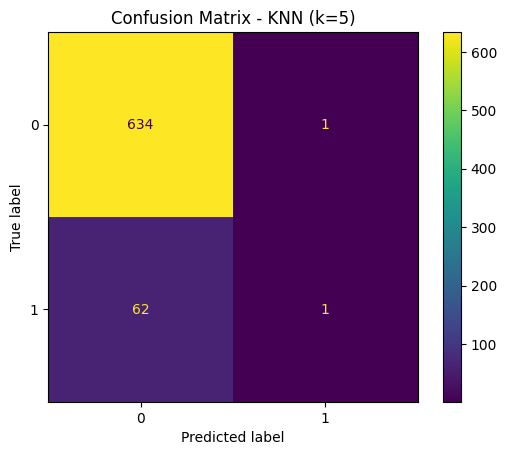

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions
y_pred = knn.predict(X_test_scaled)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# 3. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()

### **Features Importance Plot**

In [81]:
# ------------------------------
# 5. Compute permutation importance
# ------------------------------
feature_names = X.columns  # all 11 features

result = permutation_importance(
    knn,
    X_test_scaled,
    y_test,
    n_repeats=20,
    random_state=42
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": result.importances_mean,
    "Std": result.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df.to_string(index=False))

           Feature  Importance      Std
               BMI    0.003940 0.002558
               age    0.001576 0.002071
        IPW_weight    0.001576 0.001970
          survtime    0.001218 0.001521
      hgb_centered    0.000716 0.002001
       male.gender    0.000645 0.001395
           married    0.000501 0.001771
             event    0.000287 0.000731
log_creat_centered    0.000072 0.002148
         arv_naive    0.000072 0.000550
      urban.clinic   -0.000430 0.001207
           adv_HIV   -0.000788 0.001239


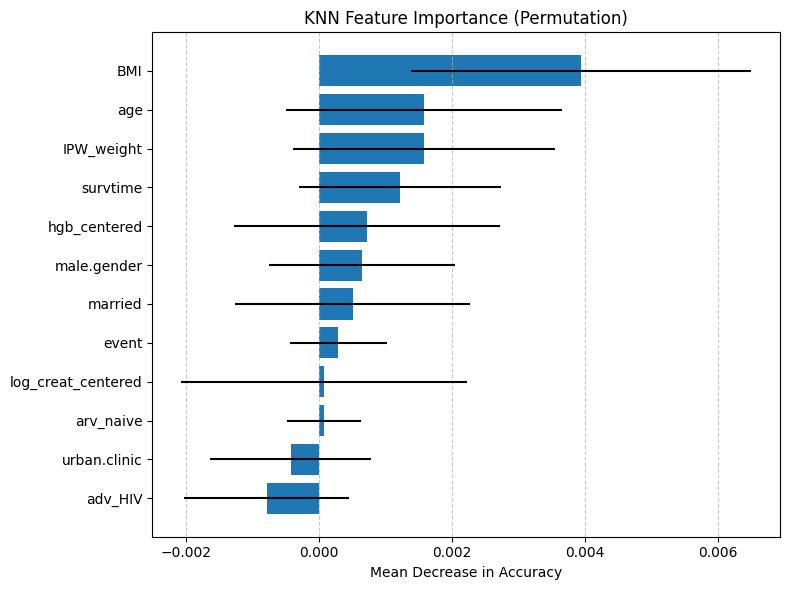

In [83]:
# ------------------------------
# 6. Plot feature importance
# ------------------------------
plt.figure(figsize=(8,6))
plt.barh(importance_df["Feature"], importance_df["Importance"], xerr=importance_df["Std"])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("KNN Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Model's Performance Metrics**

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0) # zero_division=0 handles cases where no positive predictions are made
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [88]:
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

In [89]:
metrics_df

,Metric,Score
0,Accuracy,0.909742
1,Precision,0.500000
2,Recall,0.015873
3,F1-Score,0.030769
4,ROC AUC,0.578028


### **Identify the Two Most Important Variables**

In [116]:
# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Select top 2 features
top2_features = importance_df["Feature"].values[:2]
print("Top 2 features:", top2_features)

Top 2 features: ['BMI' 'age']


### **Extract the Top Two Identified Features**

In [118]:
X_top2 = X[top2_features].values  # Keep only the two most important features

#### **Scale the Two Features** **bold text**

In [119]:
scaler_2 = StandardScaler()
X_top2_scaled = scaler_2.fit_transform(X_top2)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_top2_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#### **Train KNN with the Two Scaled Features**

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_2, y_train_2)

KNeighborsClassifier()

### **The Decision Boundary for the Two Identified Features**

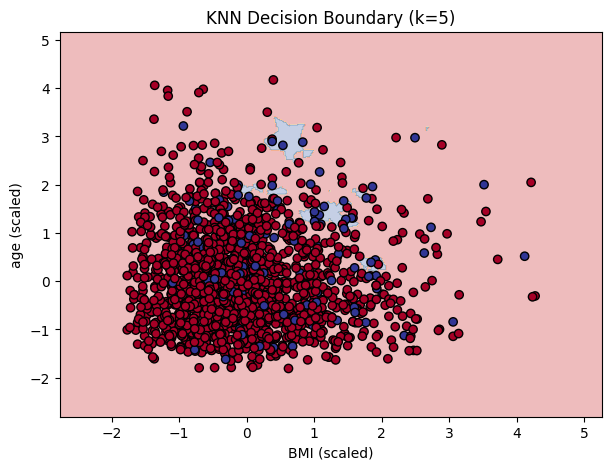

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, feature_names):
    h = 0.02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='RdYlBu')
    plt.xlabel(feature_names[0] + " (scaled)")
    plt.ylabel(feature_names[1] + " (scaled)")
    plt.title(f"KNN Decision Boundary (k={model.n_neighbors})")
    plt.show()

# Plot using top 2 important features
plot_decision_boundary(knn_2, X_train_2, y_train_2, top2_features)

### **Support Vector Machines (SVM)**

In [100]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

##### **Fit the Support Vector Machines**

In [101]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

### **View  the Classification Accuracy**

In [103]:
model_svm.score(X_test, y_test)

0.9097421203438395

### **Obtain the Confusion Matrix**

In [104]:
from sklearn.metrics import confusion_matrix
y_pred = model_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[635,   0],
       [ 63,   0]])

In [105]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with best parameters: {accuracy:.4f}")

Accuracy on the test set with best parameters: 0.9097


### **Plot the Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machines')

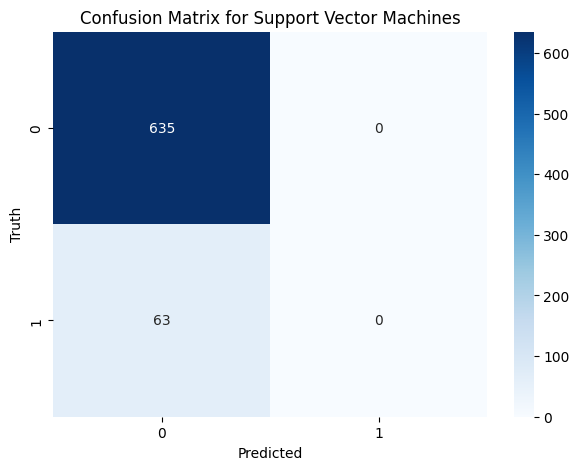

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix for Support Vector Machines")

#### **Obtain Model Performance Metrics**

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Not hypertensive","Hypertensive"]))

                  precision    recall  f1-score   support

Not hypertensive       0.91      1.00      0.95       635
    Hypertensive       0.00      0.00      0.00        63

        accuracy                           0.91       698
       macro avg       0.45      0.50      0.48       698
    weighted avg       0.83      0.91      0.87       698



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Obtain other Performance Metrics**

In [111]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.contingency_tables import mcnemar

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix values
TN, FP, FN, TP = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)

# Specificity
specificity = TN / (TN + FP)

# Positive Predictive Value (Precision)
ppv = precision_score(y_test, y_pred)

# Negative Predictive Value
npv = TN / (TN + FN)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
# No Information Rate (NIR)
nir = y_test.value_counts().max() / len(y_test)

# McNemar's Test P-Value
mcnemar_result = mcnemar(cm)
mcnemar_p_value = mcnemar_result.pvalue

# Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive Predictive Value: {ppv:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"No Information Rate (NIR): {nir:.4f}")
#print(f"P-Value [Acc > NIR]: {p_value_acc_nir:.7f}")
print(f"McNemar's Test P-Value: {mcnemar_p_value:.7f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Confusion Matrix:
[[635   0]
 [ 63   0]]
Accuracy: 0.9097
Sensitivity: 0.0000
Specificity: 1.0000
Positive Predictive Value: 0.0000
Negative Predictive Value: 0.9097
F1 Score: 0.0000
Cohen's Kappa: 0.0000
No Information Rate (NIR): 0.9097
McNemar's Test P-Value: 0.0000000
Balanced Accuracy: 0.5000
